
# Flight Price:


## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
## A1. 

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset of flight price 
flight_df = pd.read_excel('flight_price.xlsx')
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# examine rows and colums
print(flight_df.shape)


(10683, 11)


### it has 10683 rows and 11 columns 

In [4]:
# getting the basic info
print(flight_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.
## A2. 

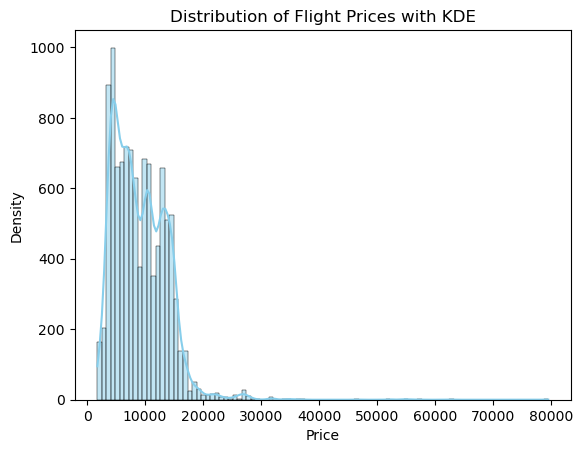

In [5]:
# Creating a distribution of flight prices using histogram
sns.histplot(flight_df['Price'], kde=True, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices with KDE')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
## A3.

In [6]:
# Using describe to get min max
price_stats = flight_df['Price'].describe()

# Print the range, min, and max
print(f"Price Range: {price_stats['min']} to {price_stats['max']}")
print(f"Minimum Price: {price_stats['min']}")
print(f"Maximum Price: {price_stats['max']}")


Price Range: 1759.0 to 79512.0
Minimum Price: 1759.0
Maximum Price: 79512.0


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.
## A4. 

In [7]:
# checking how many airlines are there in dataset
flight_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

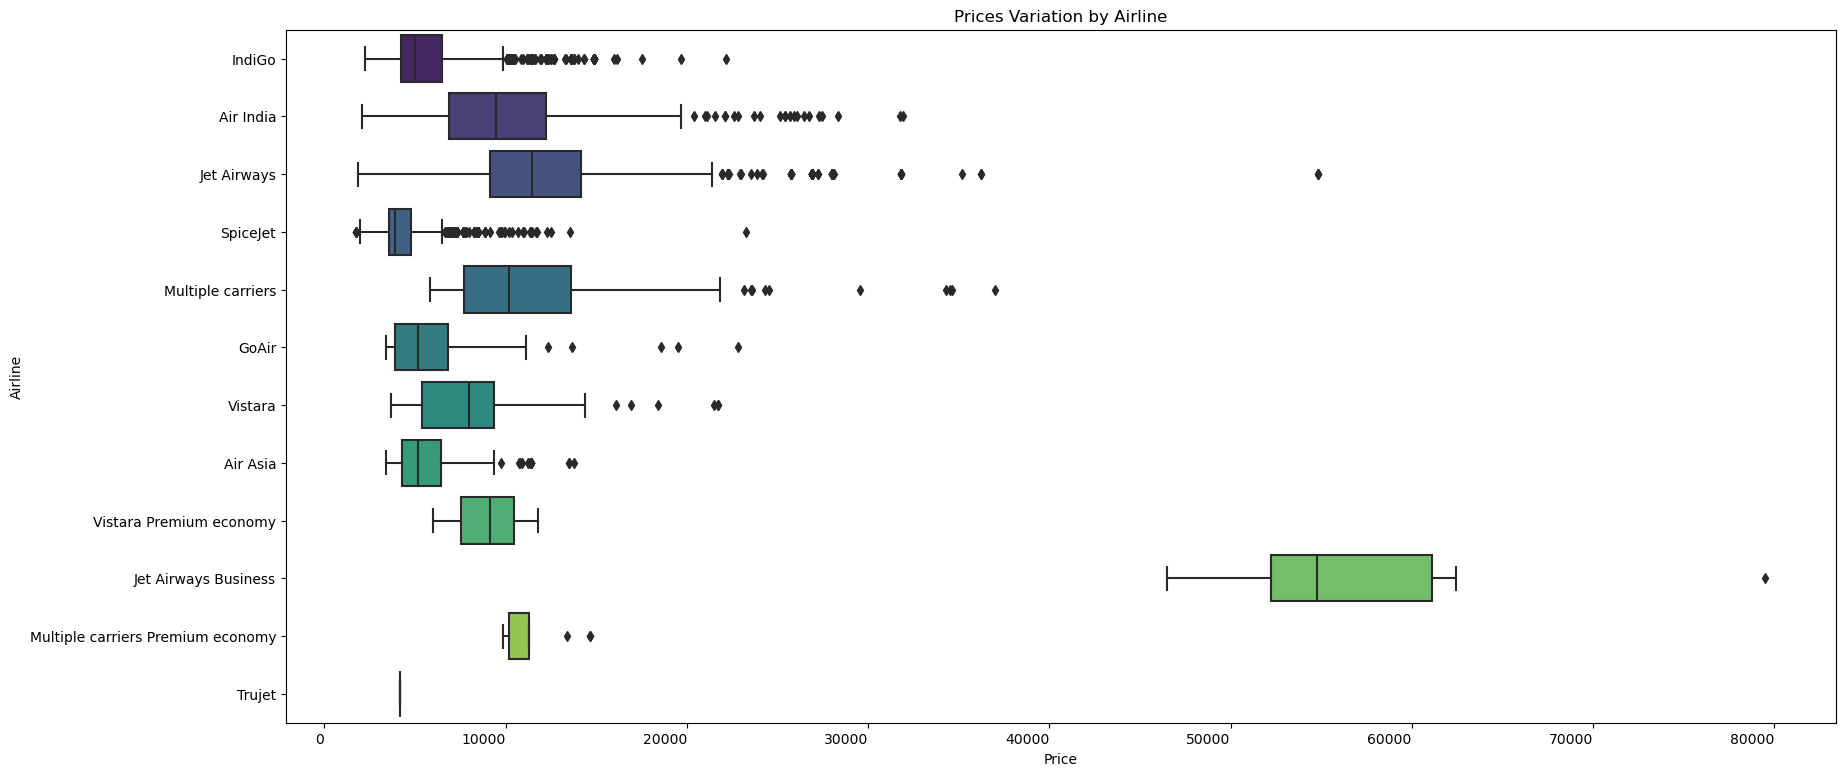

In [8]:
# Creating a box to compare the prices of different airlines
plt.figure(figsize=(20, 9))
sns.boxplot(y='Airline', x='Price', data=flight_df, palette='viridis')
plt.title('Prices Variation by Airline')
plt.xlabel('Price')
plt.ylabel('Airline')
plt.xticks(ha='right')  
plt.show()


## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.
## A5.

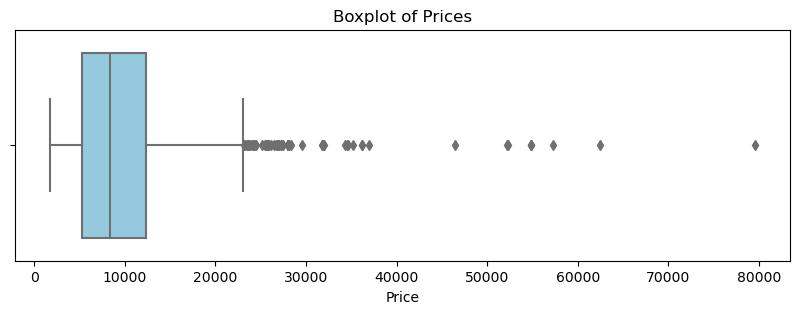

In [9]:
# creating box to identify potential outliers
plt.figure(figsize=(10, 3))
sns.boxplot(x='Price', data=flight_df, color='skyblue')
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()


In [10]:
# Calculate the interquartile range (IQR)
Q1 = flight_df['Price'].quantile(0.25)
Q3 = flight_df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = flight_df[(flight_df['Price'] < lower_bound) | (flight_df['Price'] > upper_bound)]

# Display the outliers
print("Outliers:")
print(outliers)


Outliers:
                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396      

## The presence of outliers in my dataset can have various impacts on my analysis. Here are some considerations:

1. **Skewing Descriptive Statistics:**
   - Outliers can significantly impact descriptive statistics like the mean and standard deviation. The mean is particularly sensitive to extreme values, and outliers can pull it in their direction.

2. **Model Performance:**
   - In some machine learning algorithms, especially those sensitive to outliers (like linear regression), outliers can influence the model's performance. They may disproportionately affect the model's coefficients and predictions.

3. **Normality Assumptions:**
   - Some statistical tests and machine learning algorithms assume that the data is normally distributed. Outliers can violate this assumption, leading to biased results.

4. **Data Interpretation:**
   - Outliers can distort the interpretation of patterns and relationships within the data. Analyzing summary statistics or visualizations without addressing outliers might provide a misleading picture of the underlying patterns.

5. **Robust Measures:**
   - Consider using robust measures of central tendency and spread, such as the median and interquartile range (IQR), which are less affected by outliers than the mean and standard deviation.

6. **Data Cleaning or Transformation:**
   - Depending on the nature of the outliers, you might choose to remove them, transform the data, or apply other preprocessing techniques to mitigate their impact.

7. **Domain Knowledge:**
   - Consider the context and domain knowledge. Some outliers may be valid and represent rare but important occurrences, while others might be errors or noise.

8. **Visual Exploration:**
   - Visualize the impact of outliers on your analysis. Plotting the data with and without outliers can help you understand how much they influence the results.



## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?
## A6. 
Analyzing the Flight Price dataset to identify the peak travel season involves examining several features that can provide insights into when demand and prices are typically high:

1. **Date_of_Journey:**
   - Analyze the distribution of flight prices based on the month or season of the journey. Use visualizations such as line charts or bar plots to show the average prices over different montkd2ys.

3. **Total_Stops:**
   - Evaluate how the number of stops in a flight affects the prices. Flights with fewer stops might be more in demand, leading to higher 3rices.

4. **Airline:**
   - Examine the pricing patterns for different airlines. Certain airlines may have higher prices during peak seasons or specif4c months.

5. **Additional_Info:**
   - Check for any additional information that might impact prices, such as special events, holidays, or promotions. This information may not be explicit ly captured in o5her columns.

6. **Duration:**
   - Explore the relationship between the duration of the flight and prices. Longer flights may be more expensive, but there could be variations based on patterns and make informed decisions.

### To analysis properly we have to extract date into day, month,year 

In [11]:
flight_df['Date']=flight_df['Date_of_Journey'].str.split('/').str[0]
flight_df['Month']=flight_df['Date_of_Journey'].str.split('/').str[1]
flight_df['Year']=flight_df['Date_of_Journey'].str.split('/').str[2]
flight_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [12]:
flight_df['Date']=flight_df['Date'].astype(int)
flight_df['Month']=flight_df['Month'].astype(int)
flight_df['Year']=flight_df['Year'].astype(int)
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [13]:
# droping the Date of journey
flight_df.drop('Date_of_Journey',axis=1,inplace=True)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


## Analysing average prices by month

In [14]:
print(flight_df['Month'].unique())
print(flight_df['Year'].unique())

[3 5 6 4]
[2019]


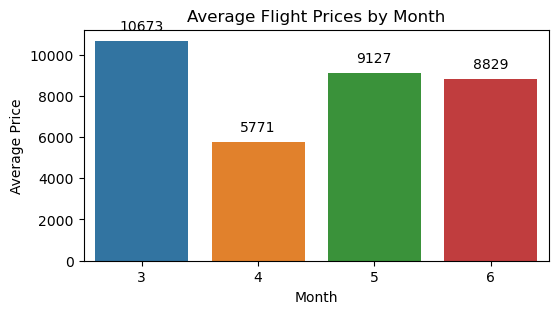

In [15]:
# Calculating the median price for each month
avg_prices_by_month = flight_df.groupby('Month')['Price'].mean().sort_values(ascending=False)

# Visualizing using a bar plot 
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=avg_prices_by_month.index, y=avg_prices_by_month.values)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

## From bar chart we can see that Month of March is peak season or month


## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

## A7.


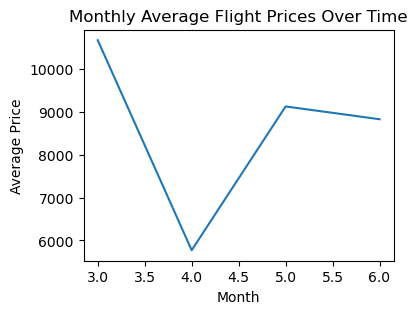

In [16]:
# Calculating the median price for each month
avg_prices_by_month = flight_df.groupby('Month')['Price'].mean().sort_values(ascending=False)

# Visualizing using a bar plot 
plt.figure(figsize=(4, 3))
sns.lineplot(x=avg_prices_by_month.index, y=avg_prices_by_month.values)
plt.title('Monthly Average Flight Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

### Trend in above line plot shows that peaking in month of march there is  a decline in flight prices in month of april then rise again in month of may and slight decline in next month i.e. june

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

## A8.
Analyzing the Flight Price dataset to identify factors that affect flight prices involves exploring various features and their relationships with pricing. Here are some features you may want to analyze, along with potential steps and methods for presenting your findings to the management team:

1. **Date and Time Features:**
   - Analyze how flight prices vary based on the date of journey, day of the week, and time of day.
   - Use visualizations like line charts, bar plots, or boxplots to show the distribution of prices over different time intervals.

2. **Source and Destination:**
   - Investigate how flight prices are influenced by the source and destination locations.
   - Visualize average prices for different source-destination pairs using bar plots or heatmaps.

3. **Airline:**
   - Explore how different airlines impact flight prices.
   - Use boxplots or violin plots to compare price distributions for each airline.

4. **Total Stops:**
   - Examine the relationship between the number of stops and flight prices.
   - Create boxplots or bar plots to illustrate how prices vary with the total number of stops.

5. **Route:**
   - Analyze how specific flight routes contribute to price variations.
   - Group flights by route and visualize the average prices for each route.

6. **Duration:**
   - Investigate how the duration of flights affects prices.
   - Use scatter plots or regression analysis to explore the correlation between duration and prices.

7. **Additional Information:**
   - Consider any additional information provided in the dataset and analyze its impact on prices.
   - For categorical variables, use bar plots, and for continuous variables, consider scatter plots or boxplots.

8. **Correlation Analysis:**
   - Perform correlation analysis to identify relationships between numerical features and flight prices.
   - Visualize correlations using a heatmap.

9. **Machine Learning Models:**
   - Train machine learning models to predict flight prices based on various features.
   - Analyze feature importance scores from models like Random Forest or Gradient Boosting to identify key factors.

10. **Presentation:**
    - Create an executive summary that outlines key findings and insights.
    - Use visualizations and charts to support your findings.
    - Provide actionable recommennding of the factors influencing flight prices.

In [17]:
flight_df['Arrival_Time']= flight_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
flight_df['Arrival_Hour']= flight_df['Arrival_Time'].str.split(':').str[0]
flight_df['Arrival_Min']= flight_df['Arrival_Time'].str.split(':').str[1]



In [18]:
flight_df['Arrival_Hour']= flight_df['Arrival_Hour'].astype(int)
flight_df['Arrival_Min']= flight_df['Arrival_Min'].astype(int)
flight_df.drop(['Arrival_Time'],axis=1,inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [19]:

flight_df['Dep_Hour']= flight_df['Dep_Time'].str.split(':').str[0]
flight_df['Dep_Min']= flight_df['Dep_Time'].str.split(':').str[1]
flight_df['Dep_Hour']= flight_df['Dep_Hour'].astype(int)
flight_df['Dep_Min']= flight_df['Dep_Min'].astype(int)
flight_df.drop(['Dep_Time'],axis=1,inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [20]:
flight_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [21]:
flight_df[flight_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [22]:
flight_df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [23]:
mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3,np.nan:1}
flight_df['Total_Stops'] = flight_df['Total_Stops'].map(mapping)



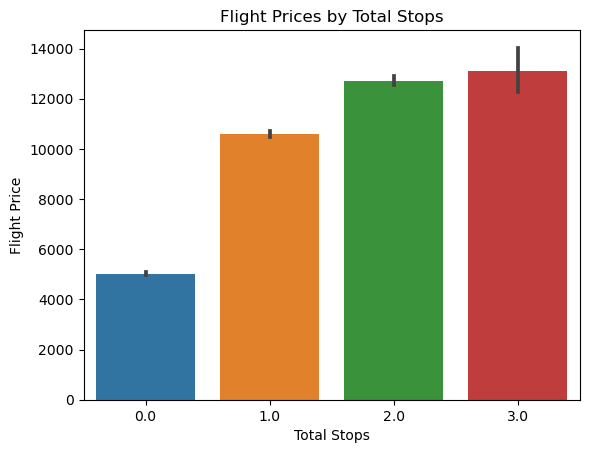

In [24]:
# Create a boxplot
sns.barplot(x=flight_df['Total_Stops'], y=flight_df['Price'])

# Set title and labels
plt.title('Flight Prices by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Flight Price')

# Display the plot
plt.show()


## We can clearly see that more stops affect the price obviously if stops increase then price will also increase